# Adversarial Training (CIFAR-10): Training the Model with Adversarially Perturbed Images 

## Imports and GPU Check

In [1]:
#imports
#Main Library (Actual Neural Network Part)
import tensorflow as tf
from tensorflow import keras
from keras import datasets, layers, models
import neural_structured_learning as nsl

# #Helper Libraries (in order to interpret and view the data)
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#Prints if a GPU is detected by the TensorFlow system
print(len(tf.config.list_physical_devices('GPU')) > 0)

True


## Importing, Validating, and Scaling the CIFAR-10 Dataset

In [2]:
#importing the Cifar-10 dataset from tensorflow
from tensorflow.keras.datasets import cifar10 
(X_train, Y_train), (X_test, Y_test) = cifar10.load_data()

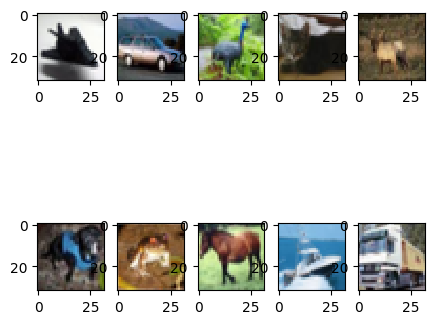

In [4]:
#validating the data (making sure this is the data I want)
fig, ax = plt.subplots(2,5, figsize = (5,5))
ax = ax.flatten()
for i in range(10):
    im_idx = np.argwhere(Y_train == i)[0][0]
    plottable_image = X_train[im_idx]
    ax[i].imshow(plottable_image, interpolation='none')

In [3]:
#scaling the data to be between 0 and 1 (inclusive)
X_train = X_train / 255.0
X_test = X_test / 255.0

## Adv Model Architecture Creation

In [6]:
#creating the model - Sequential 
model = models.Sequential()
#first conv. layer and pooling layer
model.add(layers.Conv2D(8, (2, 2), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
#second conv. layer and pooling layer
model.add(layers.Conv2D(16, (2, 2), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
#last conv. layer
model.add(layers.Conv2D(32, (2, 2), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
#last conv. layer
model.add(layers.Conv2D(64, (2, 2), activation='relu'))

In [7]:
#checking the output shape of the last conv. layer, so I can set the last Dense layer correctly
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 31, 31, 8)         104       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 8)        0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 16)        528       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 16)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 6, 6, 32)          2080      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 3, 3, 32)         0

In [8]:
#Flattening layer will create vectors in order for the neural netowrk to actually make predictions
model.add(layers.Flatten())
#adding the last dense layer to allow the neural network to classify the images
model.add(layers.Dense(64, activation = 'relu'))
#classification layer
model.add(layers.Dense(10, activation = "softmax"))

In [9]:
#Checking the Model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 31, 31, 8)         104       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 8)        0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 16)        528       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 16)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 6, 6, 32)          2080      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 3, 3, 32)         0

## NSL Wrapping and Compiling

In [10]:
#epsilon creation for attacks and NSL Wrapping
eps = 8.0 / 255.0
print(eps)

0.03137254901960784


NSL Wrapping allows the Programmer to seamlessly create an Adversarial Model

In [11]:
adv_config = nsl.configs.make_adv_reg_config(adv_step_size = 2, pgd_epsilon = eps, pgd_iterations = 7, adv_grad_norm = 'infinity')
adv_model = nsl.keras.AdversarialRegularization(model, adv_config = adv_config)

Compiling

In [12]:
#compiler which configures the model
adv_model.compile(optimizer='adam',
              loss = tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics = ['accuracy'])

## Training, Testing, And Saving of the Adversarial Model

### Training

In [13]:
#training the model
history = adv_model.fit({'feature': X_train, 'label': Y_train}, batch_size = 100, epochs = 50, verbose = 1,
                    shuffle = True)

Epoch 1/50
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module, class, method, function, traceback, frame, or code object was expected, got cython_function_or_method
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module, class, method, function, traceback, frame, or code object was expected, got cython_function_or_method
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module, class, method, function, traceback, frame, or code object was expected, got cython_function_or_method
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
500/500 [==============================] - 62s 52ms/step - loss: 2.2903 - sparse_categorical_crossentropy: 1.8073 - sparse_categorical_accuracy: 0.3448 - scaled_adversarial_loss: 0.4831
Epoch 2/50
500/500 [==============================] - 11s 23ms/step - loss: 2.0279 - sparse_categorical_crossentropy: 1.5423 - sparse_categorical_accuracy: 0.4443 - scaled_adversarial_loss: 0.4856
Epoch 3/50
500/500 [==============================] - 11s 22ms/step - loss: 1.9438 - sparse_categorical_crossentropy: 1.4602 - sparse_categorical_accuracy: 0.4778 - scaled_adversarial_loss: 0.4836
Epoch 4/50
500/500 [=============================

### Testing

Graphing the Training Accuracy

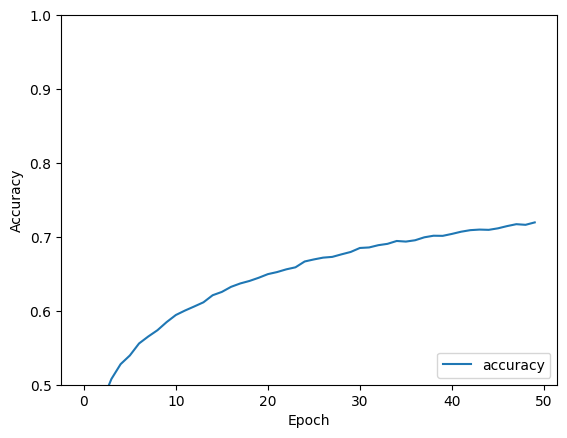

In [14]:
#checking the training accuracy 
plt.plot(history.history['sparse_categorical_accuracy'], label='accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

In [15]:
#Benign Image Adverserial Model Testing
adv_model.evaluate({'feature': X_test, 'label': Y_test})

313/313 [==============================] - 7s 21ms/step - loss: 1.4333 - sparse_categorical_crossentropy: 0.9672 - sparse_categorical_accuracy: 0.6662 - scaled_adversarial_loss: 0.4661


[1.433346152305603, 0.9672372937202454, 0.6661999821662903, 0.4661095440387726]

### Saving

In [16]:
adv_model.save('complete_saved_adv_50_cifar10_model')

INFO:tensorflow:Assets written to: complete_saved_adv_50_cifar10_model\assets


INFO:tensorflow:Assets written to: complete_saved_adv_50_cifar10_model\assets


## Attack Creation and Testing

Loading Base Model for the Functions

In [17]:
#loading the model
base_model = tf.keras.models.load_model('complete_saved_cifar10_model')

### Adversarial Attack Functions

In [18]:
#Creating the adversarial attack for adversarial training
loss_object = tf.keras.losses.SparseCategoricalCrossentropy()

def create_adv(input_image, input_label, model_type = "adv_model"):
  with tf.GradientTape() as tape:
    tape.watch(input_image)
    if(model_type == "model"):
      prediction = base_model(input_image)
    else:
      prediction = model(input_image)
    loss = loss_object(input_label, prediction)

  gradient = tape.gradient(loss, input_image)
  signed_grad = tf.sign(gradient)
  return signed_grad

def fgsm(input_image, input_label, epsilon = eps, model_type = "adv_model"):
  perturbation = create_adv(input_image, input_label, model_type)
  adv_image = input_image + perturbation * epsilon
  adv_image = tf.clip_by_value(adv_image, 0, 1)

  return adv_image

def pgd(input_image, input_label, num_steps = 7, epsilon = eps, alpha = 2, model_type = "adv_model"):
  adv_image = input_image
  for i in range(num_steps):
    adv_image = fgsm(adv_image, input_label, alpha, model_type)
    perturbation = adv_image - input_image
    perturbation = tf.clip_by_value(perturbation, -epsilon, epsilon)
    adv_image = input_image + perturbation
  
  return adv_image


### Testing

FGSM

In [19]:
#FGSM dataset creation and attack testing
fgsm_x = fgsm(tf.convert_to_tensor(X_test), Y_test)
adv_model.evaluate({'feature': fgsm_x, 'label': Y_test})

313/313 [==============================] - 8s 21ms/step - loss: 2.9829 - sparse_categorical_crossentropy: 2.2870 - sparse_categorical_accuracy: 0.2129 - scaled_adversarial_loss: 0.6959


[2.982912540435791,
 2.2870185375213623,
 0.21289999783039093,
 0.6958948373794556]

PGD

In [20]:
#PGD dataset creation and attack testing
pgd_x = pgd(tf.convert_to_tensor(X_test), Y_test)
adv_model.evaluate({'feature': pgd_x, 'label': Y_test})

313/313 [==============================] - 7s 21ms/step - loss: 3.1072 - sparse_categorical_crossentropy: 2.3267 - sparse_categorical_accuracy: 0.1819 - scaled_adversarial_loss: 0.7805


[3.1071856021881104, 2.326727867126465, 0.1818999946117401, 0.7804579138755798]